In [1]:
%pylab inline
from IPython.display import display
import fileupload
from os.path import join
import io

Populating the interactive namespace from numpy and matplotlib


Uploaded `circ.txt` (606.12 kB)


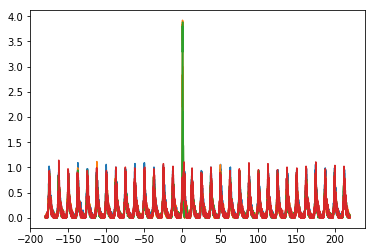

In [2]:
def get_plot(fname):
    x, y1, y2, y3, y4 = np.loadtxt(fname).T
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    plt.plot(x, y4)
    plt.show()

def cb(change):
    decoded = io.StringIO(change['owner'].data.decode('utf-8'))
    filename = change['owner'].filename
    data = decoded.read()
    with open(join('/tmp', filename), 'w') as f:
        f.write(data)
    print('Uploaded `{}` ({:.2f} kB)'.format(filename, len(data) / 2 **10))
    get_plot(join('/tmp', filename))


def upload():
    upload_widget = fileupload.FileUploadWidget()
    upload_widget.observe(cb, names='data')
    display(upload_widget)

upload()